In [ ]:
#pandas
import pandas as pd

#numpy
import numpy as np

#math
from math import ceil

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import History
import os
import keras.backend
import tensorflow as tf


# Podstawy Sztucznej Inteligencji WMII UJ 22/23
# Projekt *Diabetes prediction* - Michał Wilewski
W tym projekcie postaram się stworzyć model predykcyjny na podstawie Datsetu [Diabetes prediction dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset).

Pierwszym etapem będzie zaimportowanie, przygotowanie i oczyszczenie datasetu.

In [ ]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32544 entries, 0 to 32543
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               32542 non-null  object 
 1   age                  32544 non-null  float64
 2   hypertension         32544 non-null  int64  
 3   heart_disease        32542 non-null  float64
 4   smoking_history      32543 non-null  object 
 5   bmi                  32542 non-null  float64
 6   HbA1c_level          32542 non-null  float64
 7   blood_glucose_level  32544 non-null  int64  
 8   diabetes             32543 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1.0,never,25.19,6.6,140,0.0
1,Female,54.0,0,0.0,No Info,27.32,6.6,80,0.0
2,Male,28.0,0,0.0,never,27.32,5.7,158,0.0
3,Female,36.0,0,0.0,current,23.45,5.0,155,0.0
4,Male,76.0,1,1.0,current,20.14,4.8,155,0.0


Sczegółowy opis danych znajduje się w pliku heart-disease.names
Najważniejsze z nich to:
* gender - płeć
* age - wiek
* hypertension - nadciśnienie
* heart disease - choroby serca
* smoking history - historia palenia
* bmi - bmi
* HbA1c level - poziom HbA1c
* blood glucose level - poziom glukozy we krwi
* diabetes - cukrzyca


Sprawdzam czy nie ma nulli

In [ ]:
data.isnull().sum()

gender                 2
age                    0
hypertension           0
heart_disease          2
smoking_history        1
bmi                    2
HbA1c_level            2
blood_glucose_level    0
diabetes               1
dtype: int64

In [ ]:
data = data.dropna()
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Dzielimy zbiór danych na train i test.

In [ ]:
X = data.drop('diabetes',axis=1)
y = data.diabetes

In [ ]:
seed=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
X_train.shape,X_test.shape


((26028, 8), (6507, 8))

Czy wszystkie kolumny są reprezentowane jako kolumny numeryczne

In [ ]:
print("Data types and their frequency\n{}".format(data.dtypes.value_counts()))

Data types and their frequency
float64    5
object     2
int64      2
dtype: int64


Dwie kolumny nie reprezentowane jako numeryczne to gender i smoking history.

W "gender" zróbmy tak, że male = 1 a female = 0

W "smoking history" No Info = 0, never = 1, former = 2, current = 3, not current = 4, 5

In [ ]:
def encode_gender(label):
    if label == 'Female':
        return 0
    elif label == 'Male':
        return 1
    else:
        return 2
X_train.gender = X_train.gender.apply(encode_gender)
X_test.gender = X_test.gender.apply(encode_gender)


In [ ]:
def encoder_smoking(label):
    if label == 'No Info':
        return 0
    elif label == 'never':
        return 1
    elif label == 'former':
        return 2
    elif label == 'current':
        return 3
    elif label == 'not current':
        return 4
    else:
        return 5
X_train['smoking_history'] = X_train['smoking_history'].apply(encoder_smoking)
X_test['smoking_history'] = X_test['smoking_history'].apply(encoder_smoking)

Dane wyglądają następująco

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
15280,1,5.0,0,0.0,0,15.21,5.7,90
27627,0,48.0,0,0.0,3,20.59,5.0,158
18823,1,50.0,0,0.0,0,37.59,4.5,160
21937,0,10.0,0,0.0,0,30.14,6.0,80
7886,0,20.0,0,0.0,0,27.32,6.2,145


# Wizualizacja datasetu


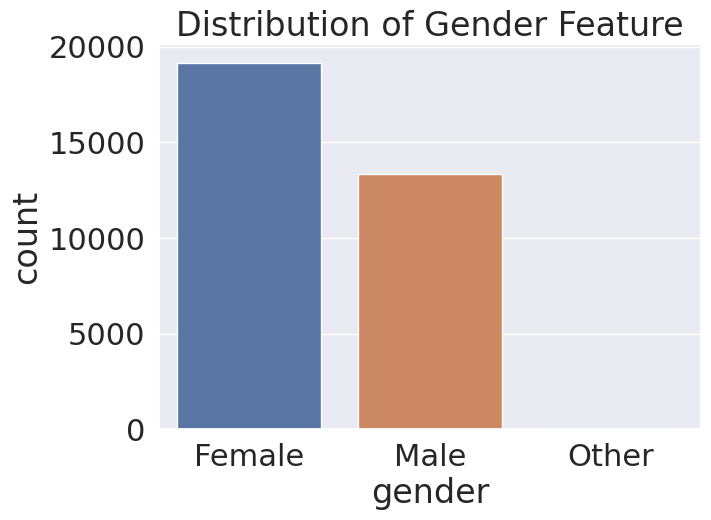

In [ ]:
plt.figure(figsize=(7,5))
sns.set(font_scale=2)
sns.countplot(x='gender',data=data);
plt.title("Distribution of Gender Feature");

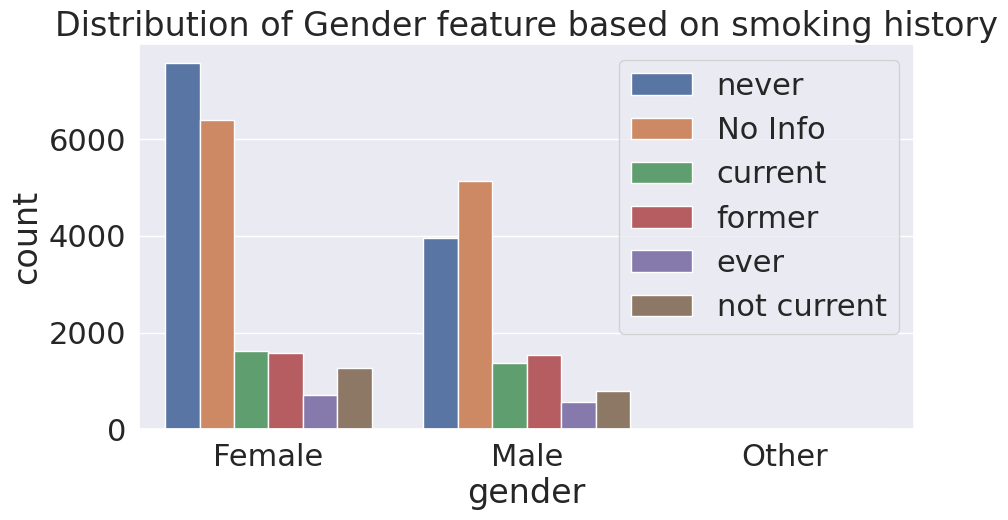

In [ ]:
plt.figure(figsize=(10,5));
sns.set(font_scale=2)
sns.countplot(x='gender',data=data,hue='smoking_history');
plt.legend(loc="upper right");
plt.title("Distribution of Gender feature based on smoking history");

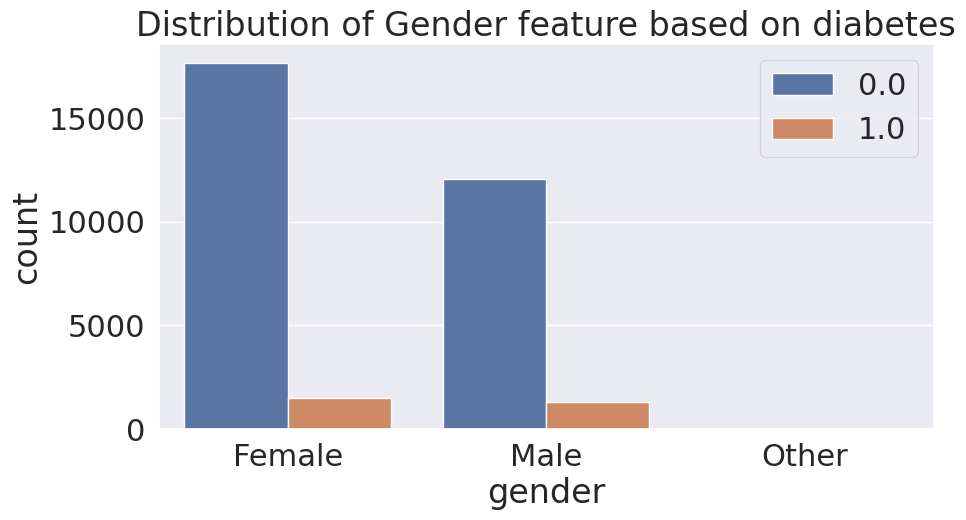

In [ ]:
plt.figure(figsize=(10,5));
sns.countplot(x='gender',data=data,hue='diabetes');
plt.legend(loc="upper right");
plt.title("Distribution of Gender feature based on diabetes");

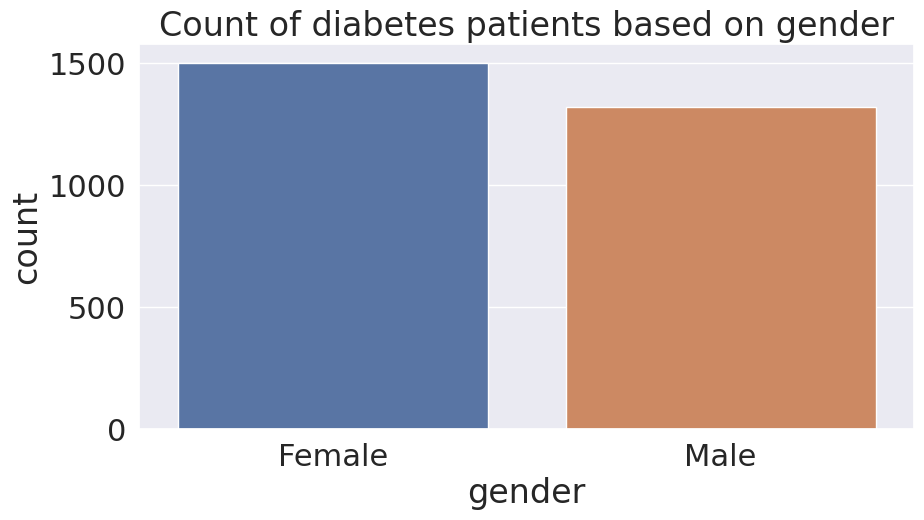

In [ ]:
diabetes_data = data[data['diabetes'] == 1]
plt.figure(figsize=(10,5));
sns.countplot(x='gender', data=diabetes_data)
plt.title("Count of diabetes patients based on gender");

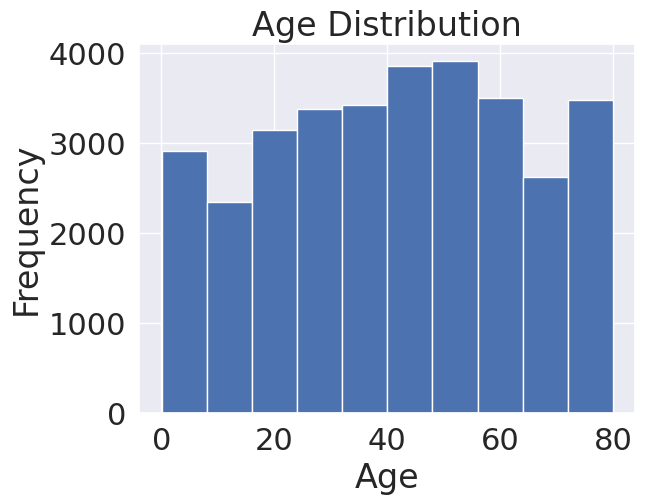

In [ ]:
plt.hist(data['age']);

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.show()

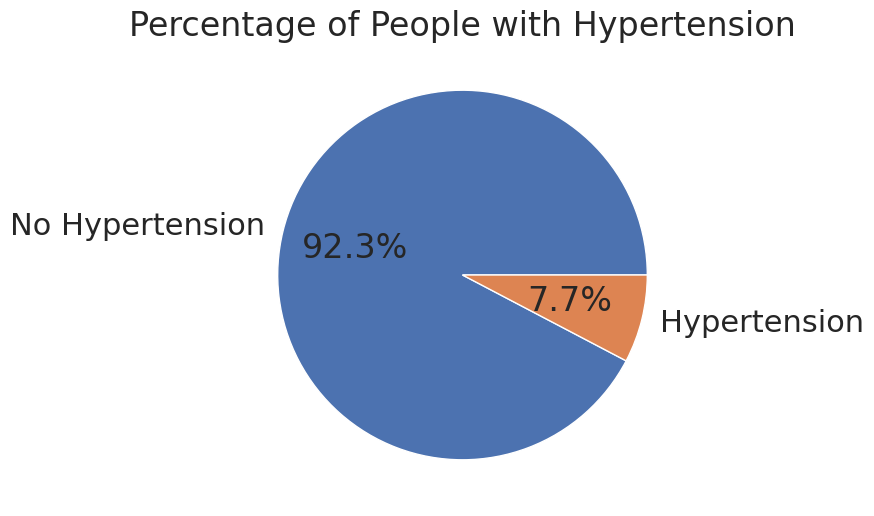

In [ ]:

hypertension_counts = data['hypertension'].value_counts()


hypertension_percentage = hypertension_counts / len(data) * 100


plt.figure(figsize=(10,6))
labels = ['No Hypertension', 'Hypertension']
plt.pie(hypertension_percentage, labels=labels, autopct='%1.1f%%')


plt.title('Percentage of People with Hypertension')


plt.show()

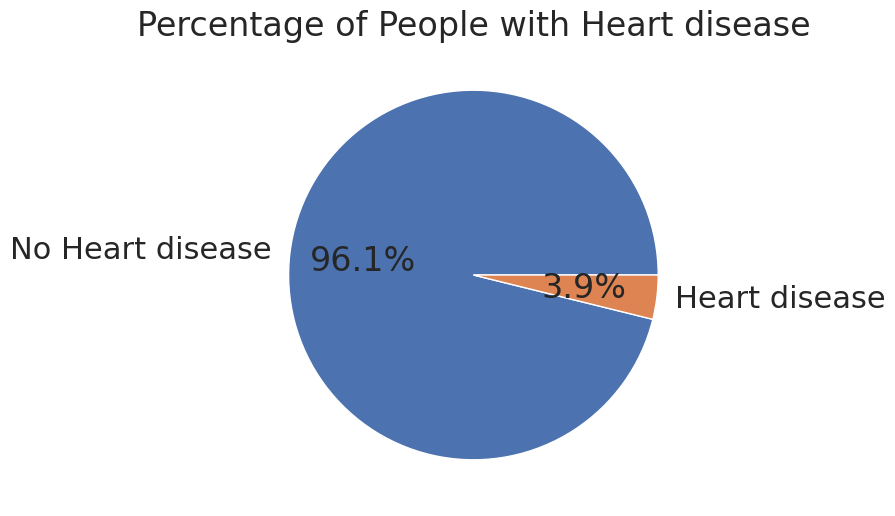

In [ ]:
heart_disease_counts = data['heart_disease'].value_counts()


heart_disease_percentage = heart_disease_counts / len(data) * 100


plt.figure(figsize=(10,6))
labels = ['No Heart disease', 'Heart disease']
plt.pie(heart_disease_percentage, labels=labels, autopct='%1.1f%%')

plt.title('Percentage of People with Heart disease')

plt.show()

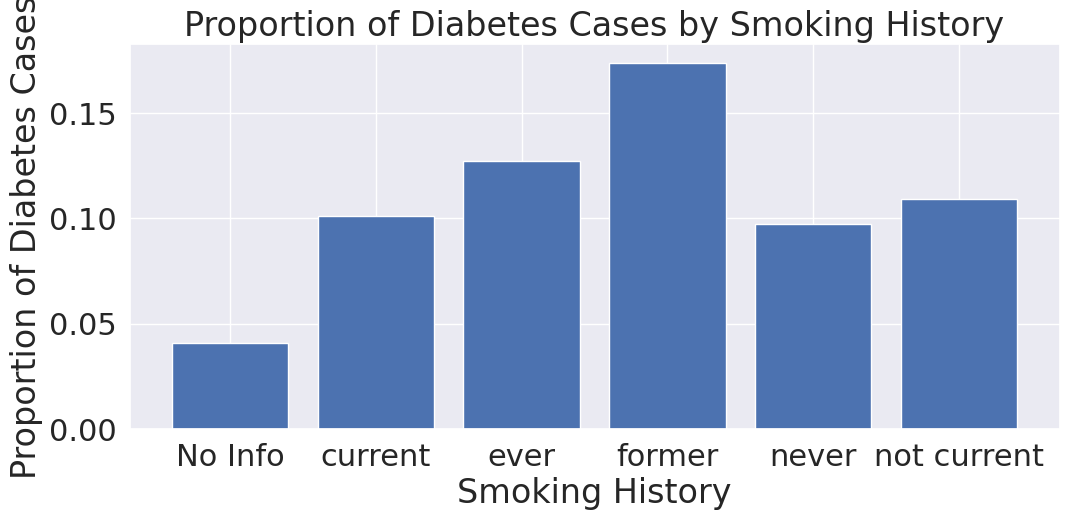

In [ ]:
grouped_data = data.groupby('smoking_history')['diabetes'].mean()


plt.figure(figsize=(12,5))
plt.bar(grouped_data.index, grouped_data.values)


plt.title('Proportion of Diabetes Cases by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Proportion of Diabetes Cases')


plt.show()

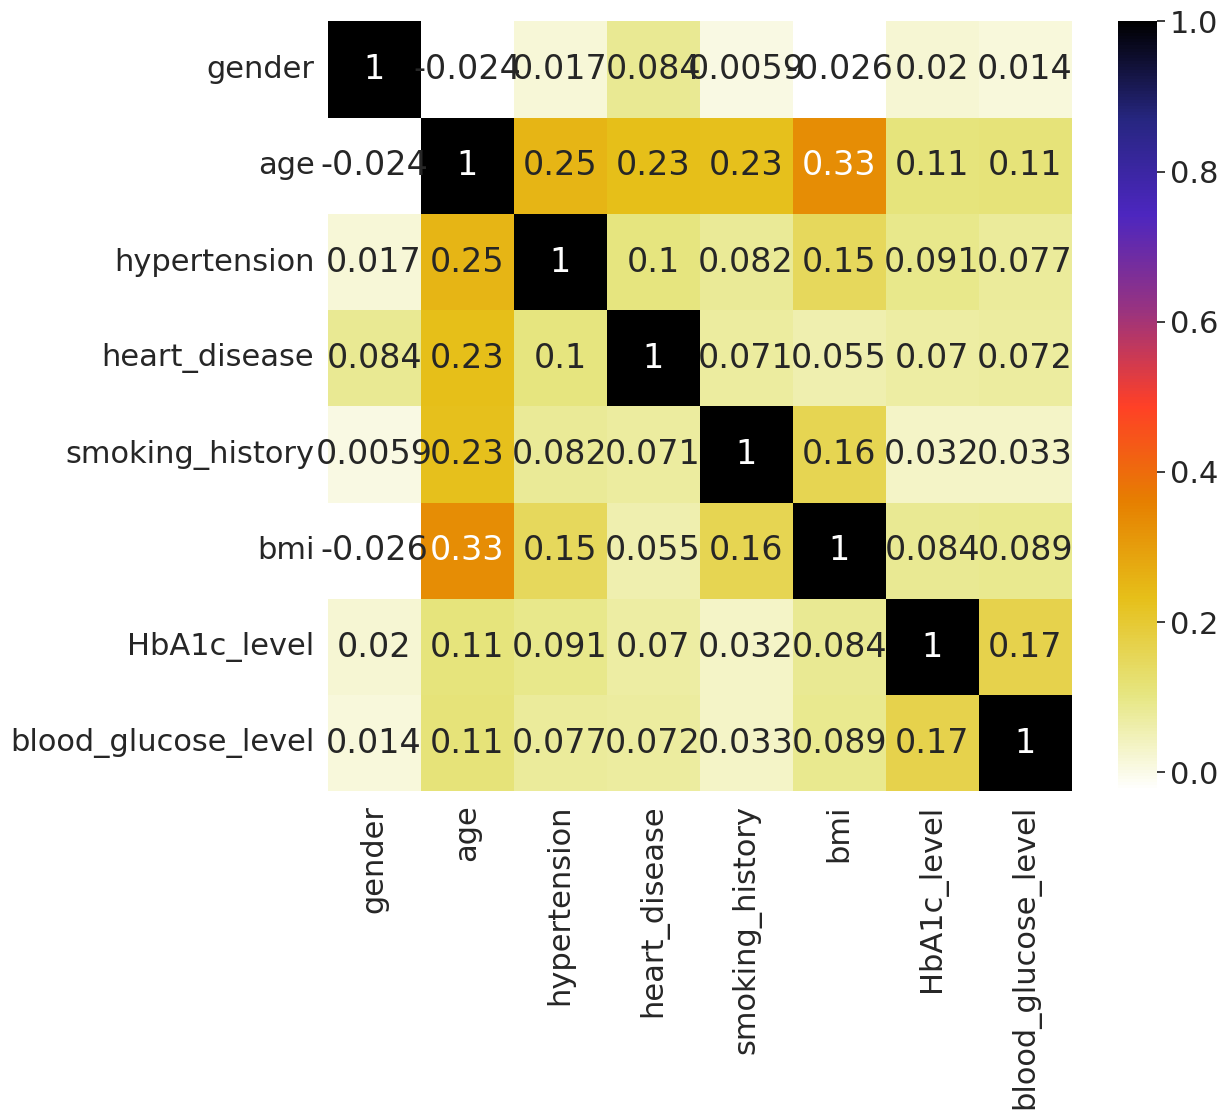

In [ ]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r);
plt.show();

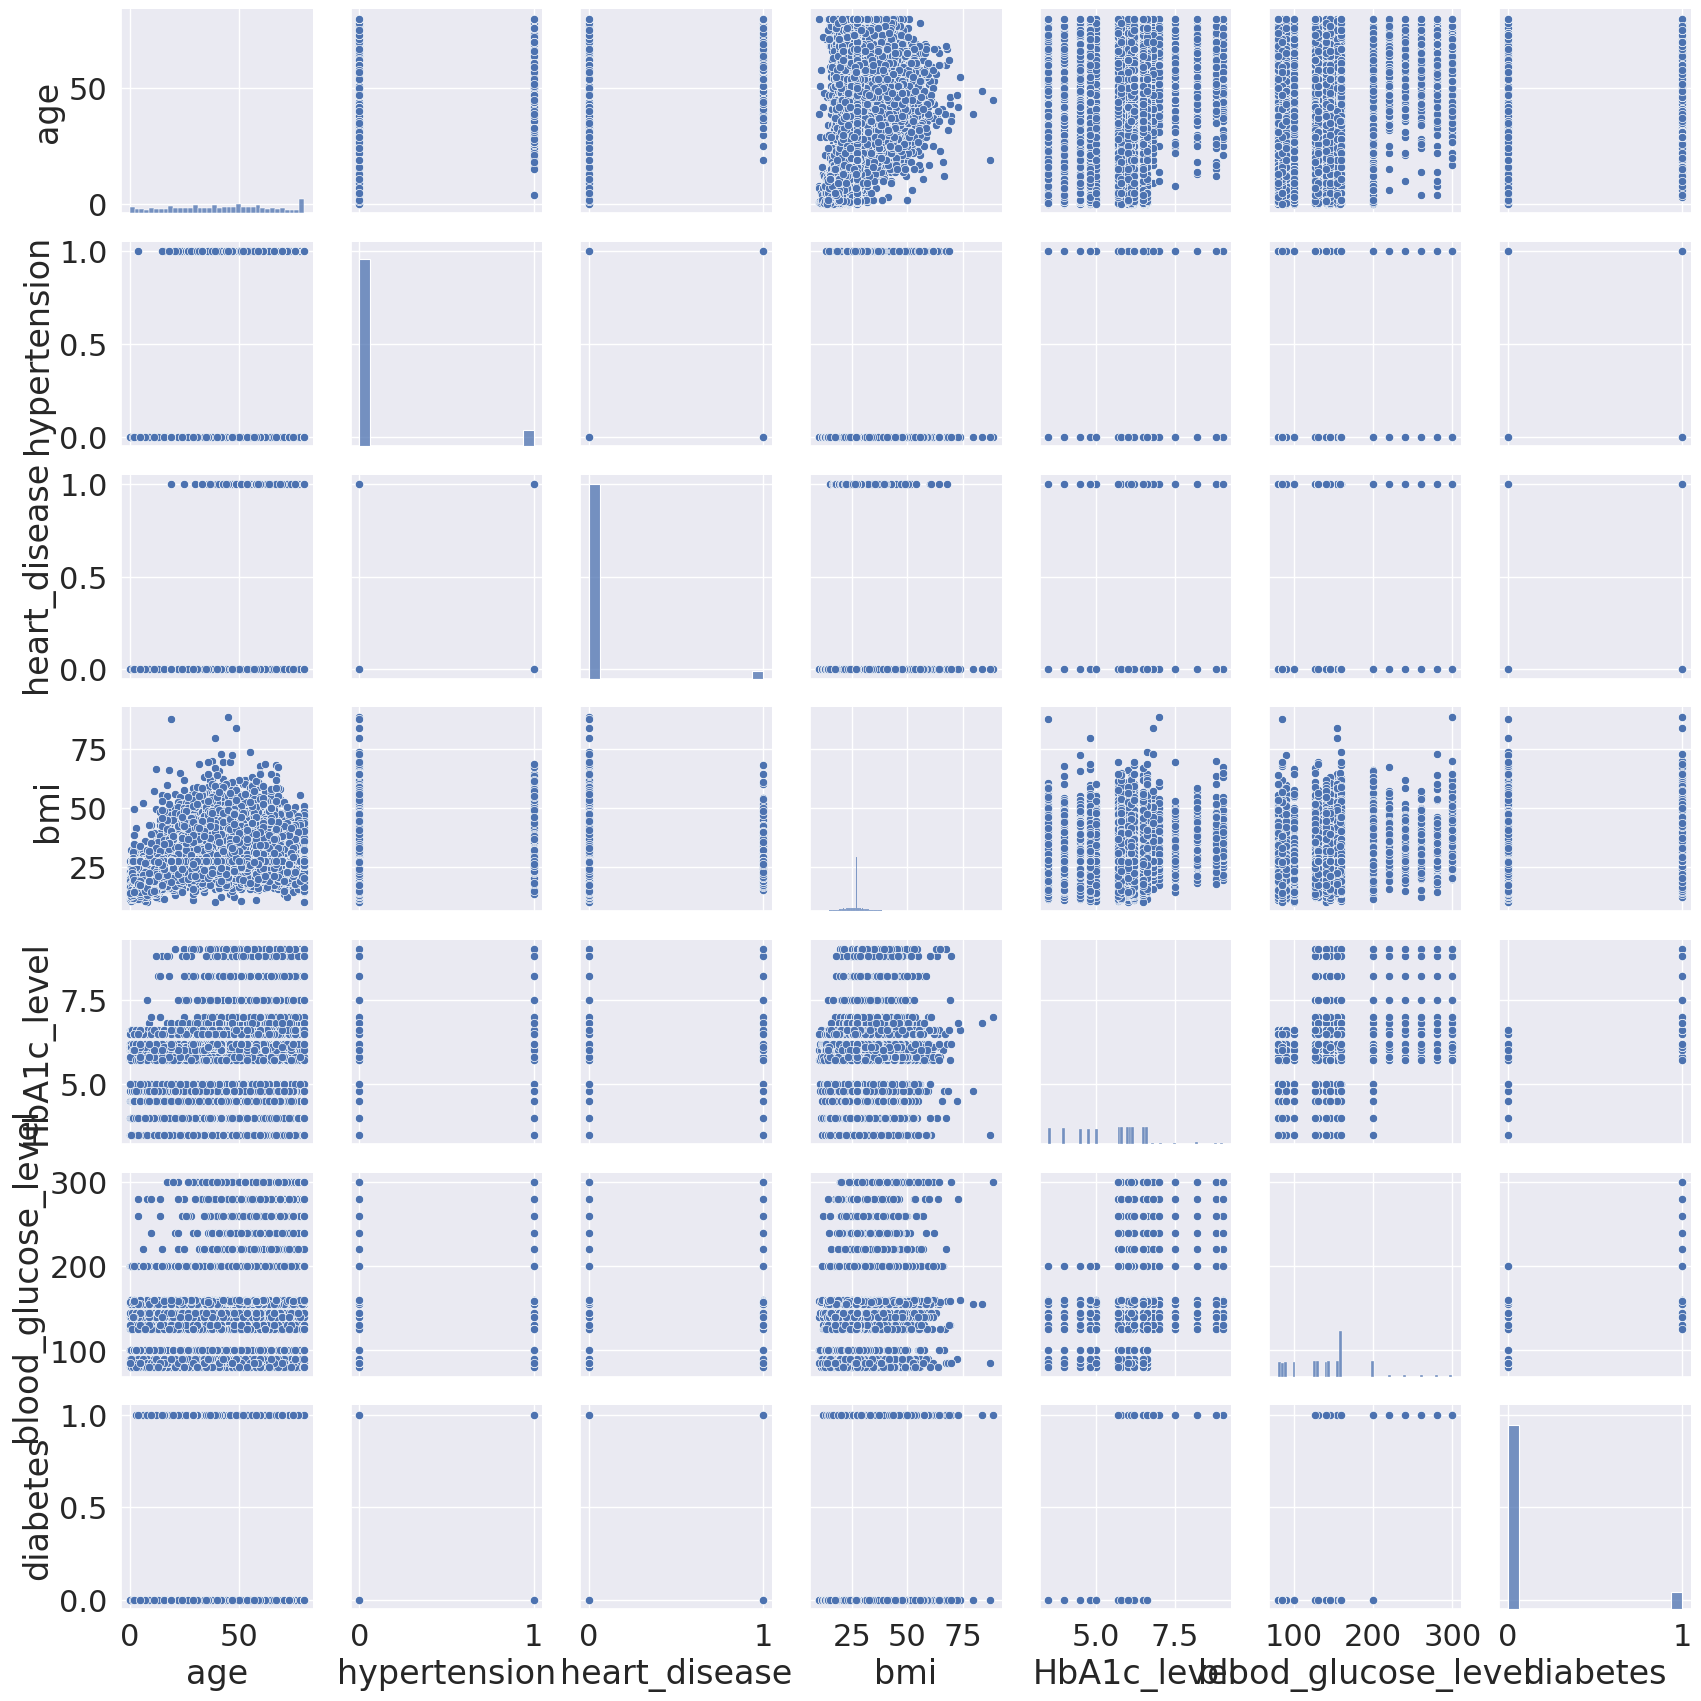

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_over, y_over = oversampler.fit_resample(X_train, y_train)

In [ ]:
X_over.shape,y_over.shape

((47548, 8), (47548,))

In [ ]:
scalar = StandardScaler()

In [ ]:
X_over_scaled = scalar.fit_transform(X_over)
X_test_scaled = scalar.transform(X_test)

# Tworzenie Pipeline
Stwórzmy następujące pipeline:
* dla SVM z jądrem rbf
* dla SVM z jądrem poly
* dla SVM liniowego
* dla regresji logistycznej


In [ ]:
svm_pipeline = Pipeline([('scale', StandardScaler()),
                                 ('classifier', SVC())])

logistic_pipeline = Pipeline([('scale', StandardScaler()),
                                 ('classifier', LogisticRegression())])

random_forest_pipeline = Pipeline([('scale', StandardScaler()),
                                   ('classifier', RandomForestClassifier())])

Po utworzeniu pipeline, możemy się wziąć za tworzenie *GridSearch*

In [ ]:
svm_param_grid = {
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ['rbf', 'poly', 'linear']
}

logistic_param_grid = {
      'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

random_forest_param_grid = {
    'classifier__n_estimators': [1, 2, 4, 8, 16, 32, 64, 96],
    'classifier__max_leaf_nodes': [5, 10, 25, 50, 70, 100]
}

svm_rbf_grid_search = GridSearchCV(svm_pipeline,
                                  param_grid=svm_param_grid,
                                  cv=kfold,
                                  refit=True)

logistic_grid_search = GridSearchCV(logistic_pipeline,
                                  param_grid=logistic_param_grid,
                                  cv=kfold,
                                  refit=True)

random_forest_grid_search = GridSearchCV(random_forest_pipeline,
                                  param_grid=random_forest_param_grid,
                                  cv=kfold,
                                  refit=True)

models = {
    "SVM": svm_rbf_grid_search,
    "Logistic": logistic_grid_search,
    "Random Forest": random_forest_grid_search
}


x_train_temp = X_train[:10000]
y_train_temp = y_train[:10000]


for name, model in models.items():
    model.fit(x_train_temp, y_train_temp)
    print(name)
    print(model.best_params_)


SVM
{'classifier__C': 0.1, 'classifier__gamma': 0.001, 'classifier__kernel': 'linear'}
Logistic
{'classifier__C': 0.1}
Random Forest
{'classifier__max_leaf_nodes': 10, 'classifier__n_estimators': 64}


# TensorBoard

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_06_21-21_50_27'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
tensor_model = Sequential()
tensor_model.add(Dense(1024, activation="relu", input_shape=(X_train.shape[1],)))
tensor_model.add(BatchNormalization())
tensor_model.add(Dense(512, activation="relu"))
tensor_model.add(BatchNormalization())
tensor_model.add(Dense(256, activation="relu"))
tensor_model.add(Dense(1, activation="sigmoid"))
tensor_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              9216      
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [ ]:
tensor_model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["binary_accuracy"])

In [ ]:
from keras.callbacks import TensorBoard
from tensorflow.keras import Model
tensorboard_cb = TensorBoard(run_logdir)
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
history = tensor_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=25,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_cb, early_stopping])

models["keras"] = tensor_model

Epoch 1/200
1042/1042 [==============================] - 11s 10ms/step - loss: 0.1572 - binary_accuracy: 0.9440 - val_loss: 0.1102 - val_binary_accuracy: 0.9614
Epoch 2/200
1042/1042 [==============================] - 12s 11ms/step - loss: 0.1269 - binary_accuracy: 0.9536 - val_loss: 0.1337 - val_binary_accuracy: 0.9530
Epoch 3/200
1042/1042 [==============================] - 9s 9ms/step - loss: 0.1202 - binary_accuracy: 0.9558 - val_loss: 0.1038 - val_binary_accuracy: 0.9623
Epoch 4/200
1042/1042 [==============================] - 10s 10ms/step - loss: 0.1193 - binary_accuracy: 0.9571 - val_loss: 0.0953 - val_binary_accuracy: 0.9654
Epoch 5/200
1042/1042 [==============================] - 10s 9ms/step - loss: 0.1141 - binary_accuracy: 0.9585 - val_loss: 0.1059 - val_binary_accuracy: 0.9637
Epoch 6/200
1042/1042 [==============================] - 10s 9ms/step - loss: 0.1134 - binary_accuracy: 0.9595 - val_loss: 0.1137 - val_binary_accuracy: 0.9556
Epoch 7/200
1042/1042 [===============

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```python
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to localhost:6006 and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

```python
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006
```

In [ ]:
columns = ["model", "accuracy", "f1", "recall", "precision"]

data = []
predicted = {}

for name, model in models.items():
    y_test_predicted = model.predict(X_test)
    if name == "keras":
        y_test_predicted = [round(x[0]) for x in y_test_predicted]

    predicted[name] = y_test_predicted

    data.append([name,
                 metrics.accuracy_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.f1_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.recall_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.precision_score(y_true=y_test, y_pred=y_test_predicted)])

results = pd.DataFrame(data, columns=columns)
print(results)

204/204 [==============================] - 1s 3ms/step
           model  accuracy        f1    recall  precision
0            SVM  0.959889  0.708380  0.556140   0.975385
1       Logistic  0.956662  0.683857  0.535088   0.947205
2  Random Forest  0.969571  0.789809  0.652632   1.000000
3          keras  0.959582  0.765806  0.754386   0.777577


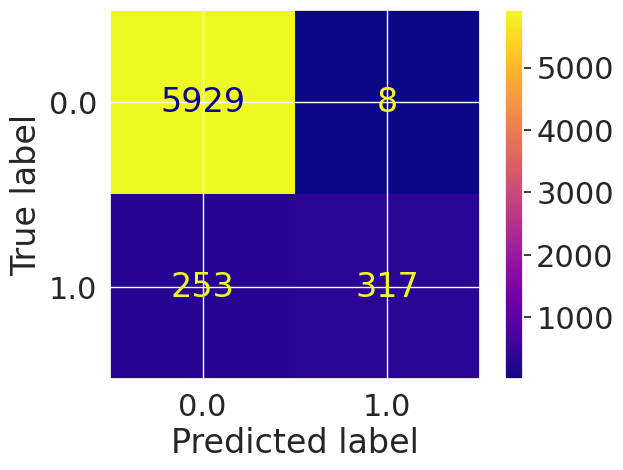

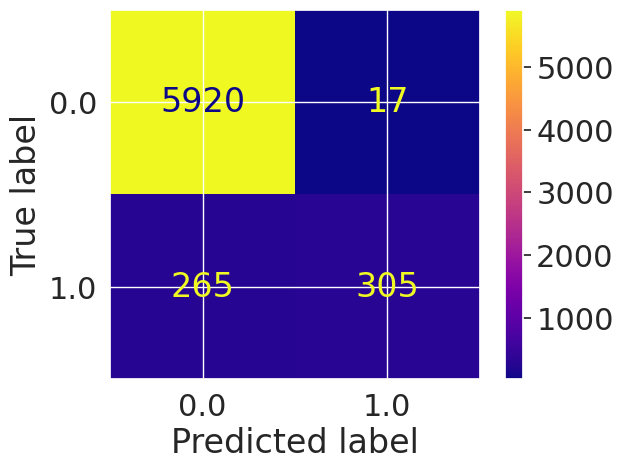

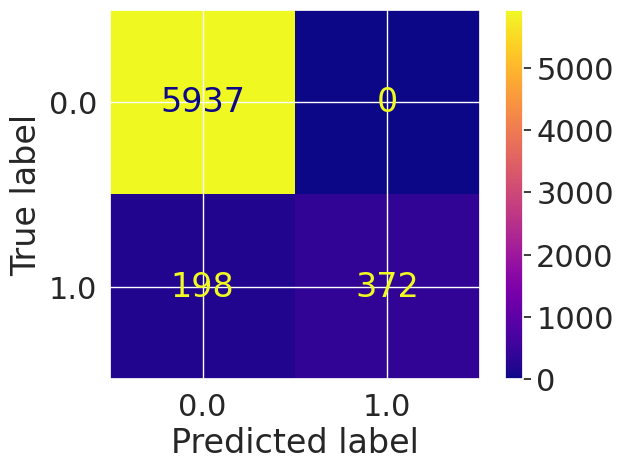

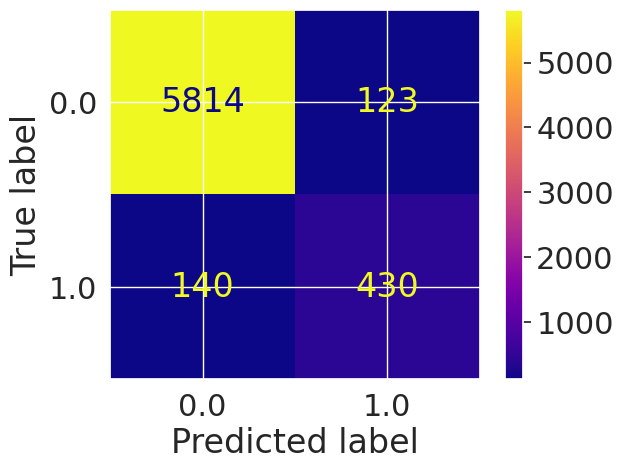

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
for name, y_pred in predicted.items():
    ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, cmap='plasma')

# Podsumowanie

Dane wyczyściliśmy i zwizualizowaliśmy.

Następnie nauczyliśmy kilka najbardziej znanych modeli uczenia maszynowego oraz stworzyliśmy model deep learningowy na podstawie tych danych.

Na końcu zwizualizowaliśmy wynik